In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

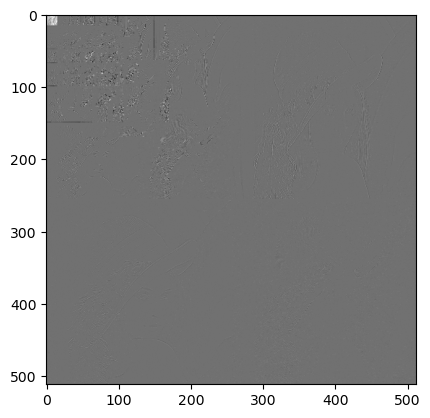

In [3]:
# load image
img = np.load('l5_decomp_quant.npy')
plt.imshow(img, cmap='gray')

In [45]:
check_filled = np.zeros(img.shape)

In [106]:
# create a EZW tree class
class EZWTree:
    def __init__(self, value, level, quadrant, coordinates, children):
        self.value = value
        self.level = level
        self.children = children
        self.quadrant = quadrant
        self.coordinates = coordinates
        self.ezwcode = None
    

def build_EZW_tree(image, level=0, coordinates=(1,0), quadrant=None):
    i, j = coordinates
    # Base case: if the coordinates are out of the image boundary, return None
    if i >= image.shape[0] or j >= image.shape[1]:
        return None

    # create the list of children coordinates
    child_coordinates = [(2*i, 2*j+1), (2*i, 2*j), (2*i + 1, 2*j), (2*i + 1, 2*j + 1)]

    # recursively create the children
    children = []
    for coord in child_coordinates:
        ci, cj = coord
        # Check if the child coordinates are within the image boundary
        if ci < image.shape[0] and cj < image.shape[1]:
            child = build_EZW_tree(image, level+1, coord, quadrant)
            children.append(child)

    # create the current node
    node = EZWTree(image[i, j], level, quadrant, coordinates, children)

    return node

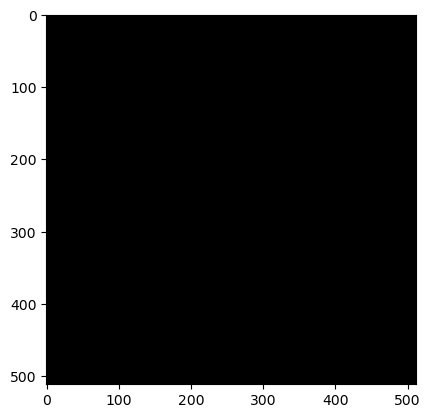

In [46]:
plt.imshow(check_filled, cmap='gray')

In [ ]:
# tree = build_EZW_tree(img, 0, (i,j), 1)

In [112]:
# enumerate the img[0,16:0,16]
root_nodes = [[None for _ in range(16)] for _ in range(16)]
for i in range(0, 16):
    for j in range(0, 16):
        # in order of quadrant 1,3,4
        child_1 = build_EZW_tree(img, 1, (i,j+16), 1)
        child_3 = build_EZW_tree(img, 1, (i+16,j), 3)
        child_4 = build_EZW_tree(img, 1, (i+16,j+16), 4)
        root_nodes[i][j] = EZWTree(img[i, j], 0, 2, (i,j), [child_1, child_3, child_4])     

In [113]:
root_nodes[3][3].children

## Set ezw code

In [ ]:
threshold = np.power(2, np.floor(np.log2(np.max(np.abs(img[0,0]))))) # need to modify this to be the max of the quadrant later

In [73]:
root_nodes[4][4].children

[]

In [55]:
root = root_nodes[0][0].children

IndexError: list index out of range